# Biomécanique du saut en longueur

On va chercher dans la suite de ce TD à réaliser une étude des trajectoires des athlètes de saut en longueur
![alt text](f1.png "Title")

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Définition des données du problème

In [2]:
n=2 #nombre d'athlètes
nom=['Lewis','Powell']
couleurs=['r','b','g','c','k']
v0=np.array([10.,10.]) # vitesse initiale en m/s
alpha= np.array([np.radians(20.8),np.radians(17.9)]) # angle d'envol en degrés
h0=0.57*np.array([1.88,1.88])# hauteur du centre de masse à l'impulsion en supposant l'athlète debout en m
ma=np.array([80,77]) # masse des athlètes en kg
l=1.2 #coefficient de frottement en kg/s
g=9.81 #gravité en m/s2
disc=500 #nombre de points pour la génération des trajectoires

## Fonction de calcul de la vitesse et position du sauteur à l'instant t, avec frottements

In [3]:
def Traj(v0,alpha,h0,m,l,t):
    h=l/m
    dX=np.zeros(2)
    dX[0]=v0*np.cos(alpha)*np.exp(-h*t)
    dX[1]=(v0*np.sin(alpha)+g/h)*np.exp(-h*t)-g/h
    X=np.zeros(2)
    X[0]=v0*np.cos(alpha)*(1-np.exp(-h*t))/h
    X[1]=(v0*np.sin(alpha)+g/h)*(1-np.exp(-h*t))/h-g*t/h+h0
    return np.array(X),np.array(dX)


## Fonction de calcul de la position et de la vitesse à l'instant t du saut, sans frottement

In [4]:
def Traj_sansf(v0,alpha,h0,m,l,t):
    dX=np.zeros(2)
    dX[0]=v0*np.cos(alpha)
    dX[1]=-g*t+v0*np.sin(alpha)
    X=np.zeros(2)
    X[0]=v0*np.cos(alpha)*t
    X[1]=-g*t*t/2+v0*np.sin(alpha)*t+h0
    return np.array(X),np.array(dX)

## Fonction de calcul du temps de vol et de la longueur de saut

In [5]:
def Tvol(func,v0,alpha,h0,m,l,a,b,tol,hf):
    while abs(b-a)>tol:
        [X1,dX1]=func(v0,alpha,h0,m,l,(a+b)/2)
        [X2,dX2]=func(v0,alpha,h0,m,l,a)
        if (X1[1]-hf)*(X2[1]-hf) < 0:
            b=(a+b)/2
        else:
            a=(a+b)/2
    return (a+b)/2,X1[0]


## Calcul du temps de vol et de la longueur des sauts

In [6]:
tempsvol=np.zeros(n)
distance=np.zeros(n)
for i in range(0,n):
    [tempsvol[i],distance[i]]=Tvol(Traj,v0[i],alpha[i],h0[i],ma[i],l,0.2,3,0.01,0.25)

print('Le temps de vol est de :')
print(tempsvol)
print('La longueur de saut est de:')
print(distance)

Le temps de vol est de :
[0.90820312 0.82617188]
La longueur de saut est de:
[8.40733081 7.83709662]


## Génération des trajectoires de saut

In [7]:
traj=np.zeros((3*n,disc))
for i in range(0,n):
    x=np.linspace(0, tempsvol[i], num=disc)
    for j in range(0,disc):
        [X1,dX1]=Traj(v0[i],alpha[i],h0[i],ma[i],l,x[j])
        traj[i*3,j]=x[j]
        traj[(i*3+1),j]=X1[0]
        traj[(i*3+2),j]=X1[1]

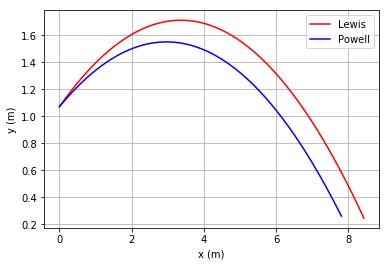

In [8]:

for i in range(0,n):
        plt.plot(traj[3*i+1,:],traj[3*i+2,:],couleurs[i])

plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend(nom)
plt.grid()
plt.show()